In [14]:
#Needed in general


import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5
import gc

#Quick fudge to make import from ../Scripts work
sys.path.append('../../../Scripts')

#Custom imports
# import ClassCOMPAS     as CC ###
# import ClassFormationChannels as FC a


# import script that has formation channel classification functions:
from PostProcessingScripts import * 
# from ClassFormationChannels_5mainchannels import * 



from astropy import units as u
from astropy import constants as const

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# print(fs)

import astropy
import seaborn as sns
# from seaborn_utility import cmap_from_colour

from astropy import units as u
from astropy import constants as c

In [2]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
#     DCOtype='BBH'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
#     print(fdata.keys())
    
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1
        
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     w = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']              
#     varlist = [Chirpmass, M1, M2, MassRatio]
    
    
#     levels = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
#     level_labels = [r"$98\%$", r"$90\%$", r"$75\%$", r"$50\%$", r"$25\%$", r"$10\%$", r"$0\%$"]

    
    
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(10.9-1.2)) & ((M2+M1)<=(10.9+1.1)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) & (((M2+M1)>=(7.1 -1.4)) & ((M2+M1)<=(7.1 +1.5)))
    
#     fs_l = 20 # label fontsize
    
#     cGW1 = 'lightskyblue' 
#     cGW0 = 'orange'
#     LEGEND = True 
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 75)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=3, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=3, zorder=3)   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=3, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
#                 if param_x== r'$m_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 27)
#                 if param_x==  r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 6.2)
                    
                    
                    
#                 if param_x==r'$q $':
#                     xx = [-100, -50]
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

#                 if jj==(len(var)-1):
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 
                    
#                 if ii==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 # cut axes for chirp and MBH mass 
#                 if param_x==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 27)
#                 if param_x== r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
#                     axe[ii,jj].set_xlim(jj_minn, 6.2)
#                 if param_y==  r'$m_{\rm{BH}} \ [M_{\odot}]$':
#                     axe[ii,jj].set_ylim(ii_minn, 27)
#                 if param_y==r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$':
#                     axe[ii,jj].set_ylim(ii_minn, 6.2)                
                
#                 x = varlist[jj] #np.linspace(0,1,100)
#                 y = np.ones_like(varlist[jj])
#                 print(np.shape(varlist[jj]))
#                 print(np.shape(x))
#                 N = 1000#  len(varlist[jj])


#                 sns.kdeplot(x=varlist[jj][0:N], y=varlist[ii][0:N], weights=w[0:N], ax=ax[ii, jj],  color='gray', shade=True, levels=levels, bw_method=0.3, zorder=9)
#                 ax[ii,jj].scatter(varlist[jj][0:N], varlist[ii][0:N], s=140*w[0:N], color='gray', zorder=4)
                
#                 ax[ii,jj].scatter(varlist[jj][maskM2firstSN], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
# #                 ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
#                 if (ii==(len(var)-1)):
#                     print(ii)
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
#                 if jj==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 


#     cmap = cmap_from_colour('gray')
#     scatter = ax[0,0].scatter(np.ones_like(levels) * 1e-5, np.ones_like(levels) * 1e-21, c=levels, cmap=cmap)
#     inset_ax = ax[1,2].inset_axes([0.25, 0.5, 1.5, 0.18])
#     cbar = f.colorbar(scatter, ax=ax[0,1], cax=inset_ax, boundaries=levels, orientation="horizontal")
#     cbar.set_ticklabels(level_labels)
#     cbar.ax.tick_params(labelsize=26)                    

#     ax[1,2].annotate('All BHNS', xy=(1.0, 0.72), xycoords="axes fraction",
#                      fontsize=fs+10, color="black", ha="center", va="bottom")                     
                    
                    
                    
                    
                    
# labellist=[r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$m_{\rm{BH}} \ [M_{\odot}]$', r'$m_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $'] #,  r'$\log_{10}(t) $']     

# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'
# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_BHBH' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()






In [3]:
# fs=20
# def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    

    
#     DCOtype='BHNS'
#     # path for files 
#     path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
#     path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

#     # read in data 
#     fdata = h5.File(path)
# #     print(fdata['doubleCompactObjects'].keys())
    
#     # M1 will be the most massive, M2 the least massive compact object. 
#     M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
#     Chirpmass = chirpmass(M1, M2)
#     MassRatio = M2/M1
    
    
#     seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
#     seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
#     # get only SN seeds for DCOs 
#     maskSNdco = np.in1d(seedsSN,  seedsDCO) 
#     whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
#     whichSN1 = whichSN[::2] # get whichStar for first SN 


#     separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
#     separationPreSN2 = separationPreSN[1::2] # in Rsun. 


#     maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )  
#     print('sum NS-BH mask = ', np.sum(maskNSBH))

#     print('sum mask = ', np.sum(maskSNdco))

#     spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
#     print(spinBH)
    
        
#     ### read in MSSFR weights: ###
#     mssfr = '112' # mssfr that matches LIGO observed rates.
#     # get detected weights
#     fparam_key = 'weights_detected'
#     weightheader = 'w_' + mssfr
#     w = fdata[fparam_key][weightheader][...].squeeze()
        
#     labellist=[ r'$\rm{M}_{\rm{chirp}}$', r'$\rm{M}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{M}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
#            r'$q $', r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']              
#     varlist = [Chirpmass, M1, M2, MassRatio, spinBH]
    
#     print(len(w))
#     fraction = np.sum(w[maskNSBH]) / np.sum(w)
#     print('fraction=', fraction)
    
    
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
#     fs_l = 20 # label fontsize
    
#     cGW1 = 'lightskyblue' 
#     cGW0 = 'orange'
#     LEGEND = True 
#     for jj, param_x in enumerate(var):
#         jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

#         for ii, param_y in enumerate(var):

#             ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
#             if ii==jj:
#                 nrbins=np.linspace(jj_minn, jj_maxx, 100)
#                 hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
#                 ylabel='PDF'
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(0,1)
                
#                 if param_x==r'$q $':
#                     xx = [-100, -50]
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
# #                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
#                     ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.65, 0.9), frameon=False)
                    

#                 if jj==(len(var)-1):
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

#                 if ii!=0:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 
                    
#                 if ii==0:
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=r'$\textbf{PDF}$', setMinor=False, labelpad=10, fontsize=fs_l)

#             elif jj>ii:
#                 ax[ii,jj].set_axis_off()                    

#             else:
#                 print('ii,jj=', ii, jj)
#                 axe[ii,jj].set_xlim(jj_minn, jj_maxx)
#                 axe[ii,jj].set_ylim(ii_minn, ii_maxx)
#                 N=1000 # temp 
#                 ax[ii,jj].scatter(varlist[jj][0:], varlist[ii][0:], s=140*w[0:], color='lightgray', zorder=1)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
#                 ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)
                
#                 if (ii==(len(var)-1)):
#                     print(ii)
# #                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
#                 if jj==0:
# #                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
#                     ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
#                 else:
#                     axe[ii,jj].set_yticks([])
#                     axe[ii,jj].set_yticklabels( () ) 

# labellist=[ r'$M_{\rm{chirp}}$', r'$M_{\rm{BH}} \ [M_{\odot}]$', r'$M_{\rm{NS}} \ [M_{\odot}]$',\
#            r'$q $', r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']     

# f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

# mssfr = '112' # mssfr that matches LIGO observed rates.

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)#2)
# model='P'
# plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
# plt.savefig('./Scatter_Final_spin_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
# plt.show()






ii,jj= 0 0
ii,jj= 1 0
ii,jj= 2 0
ii,jj= 3 0
ii,jj= 4 0
4
ii,jj= 1 1
ii,jj= 2 1
ii,jj= 3 1
ii,jj= 4 1
4
ii,jj= 2 2
ii,jj= 3 2
ii,jj= 4 2
4
ii,jj= 3 3
ii,jj= 4 3
4
ii,jj= 4 4


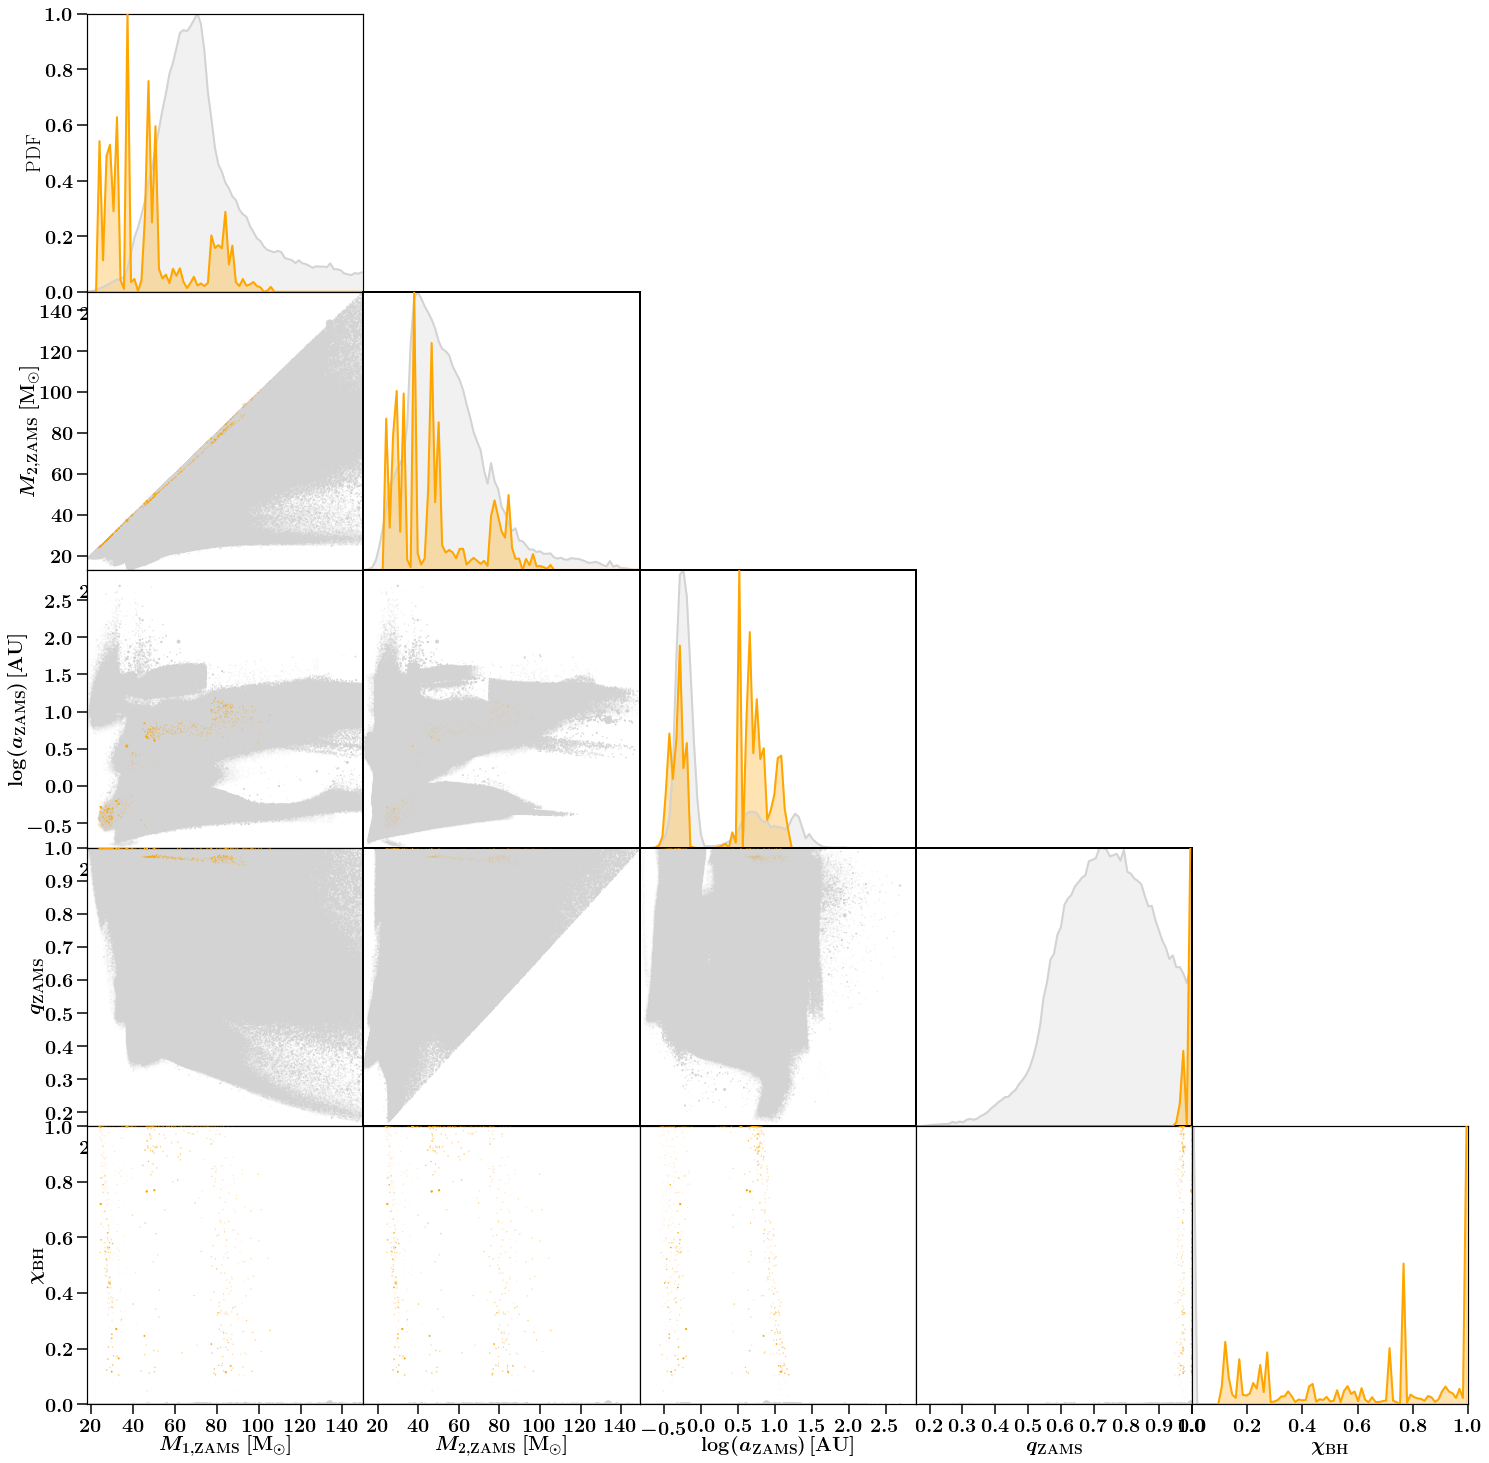

In [4]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    
    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    
    
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 


    maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )  

    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
    
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio, spinBH]
    
    
    maskSpin = (spinBH >= 0.1)
#     maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
#     maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskSpin], bins=nrbins, weights=w[maskSpin])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
#                 hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
#                 yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
#                 xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
#                 axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
#                 axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = r'$\chi > 0.1$')
#                     axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                if (ii ==4) | (jj==0):
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=4400*w[maskSpin], color='orange', zorder=10)
#                     ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=4400*w[maskGW200115], color='lightskyblue', zorder=10)
                
                else:
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskSpin], varlist[ii][maskSpin], s=140*w[maskSpin], color='orange', zorder=10)
#                     ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)

                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
       r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']                      
                    
                    
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_ZAMS_Spin2_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()

In [ ]:
fs=20
def plot2DdistributionScatter(axe, var, BPSmodelName='A'):
    
    DCOtype='BHNS'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)
    
    
    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1

    ### FOR SPIN ###
    
    
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
    whichSN1 = whichSN[::2] # get whichStar for first SN 

    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 


    maskNSBH = ((whichSN1==2) & (M1>M2) ) | ((whichSN1==1) & (M1<M2) )  

    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)
    
    ### read in MSSFR weights: ###
    mssfr = '112' # mssfr that matches LIGO observed rates.
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()
        
    labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
           r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']      
    
    
    
    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    separationInitial = np.log10(fdata['doubleCompactObjects']['separationInitial'][...].squeeze())
    Metallicity = np.log10(fdata['doubleCompactObjects']['Metallicity1'][...].squeeze())
    massRatio = M2ZAMS / M1ZAMS 
    
    varlist = [M1ZAMS, M2ZAMS, separationInitial, massRatio, spinBH]
    
    
    
    maskGW200105  = ((M1 <= (8.9+1.2))  & (M1>=(8.9-1.5))) & ((M2 <= (1.9+0.3))  & (M2>=(1.9-0.2))) & ((chirpmass(M1,M2)>=(3.41-0.07)) & (chirpmass(M1,M2)<=(3.41+0.08))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35)))
    maskGW200115  = ((M1 <= (5.7+1.8))  & (M1>=(5.7-2.1))) & ((M2 <= (1.5+0.7))  & (M2>=(1.5-0.3))) & ((chirpmass(M1,M2)>=(2.42-0.07)) & (chirpmass(M1,M2)<=(2.42+0.05))) & ((M2/M1>=(0.26-0.1)) & (M2/M1<=(0.26+0.35))) 
    
    fs_l = 20 # label fontsize
    
    cGW1 = 'lightskyblue' 
    cGW0 = 'orange'
    LEGEND = True 
    for jj, param_x in enumerate(var):
        jj_minn,jj_maxx = min(varlist[jj]), max(varlist[jj])

        for ii, param_y in enumerate(var):

            ii_minn,ii_maxx = min(varlist[ii]), max(varlist[ii])
            if ii==jj:
                nrbins=np.linspace(jj_minn, jj_maxx, 80)
                hist, bin_edges = np.histogram(varlist[jj], bins=nrbins, weights=w)
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color='lightgray', lw=2, zorder=2)
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color='lightgray', zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200105], bins=nrbins, weights=w[maskGW200105])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW0, lw=2, zorder=3)   
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW0, zorder=2, alpha=0.3)
                
                hist, bin_edges = np.histogram(varlist[jj][maskGW200115], bins=nrbins, weights=w[maskGW200115])
                yy = hist / np.max(hist) # normalize by max to set highest bin to fixed height 1 
                xx = (bin_edges[:-1]+ bin_edges[1:])/2 # center of bins
                axe[ii,jj].plot(xx, yy, color=cGW1, lw=2, zorder=3)  
                axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=yy, color=cGW1, zorder=2, alpha=0.3)
                
                ylabel='PDF'
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(0,1)
                
                if param_x==r'$q $':
                    xx = [-100, -50]
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightgray', zorder=2, alpha=0.3, label='All BHNS')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='orange', zorder=2, alpha=0.3, label = 'GW200105')
                    axe[ii,jj].fill_between(xx, y1=np.zeros_like(xx), y2=np.ones_like(xx), color='lightskyblue', zorder=2, alpha=0.3, label = 'GW200115')
#                     ax[ii,jj].set_legend(fontsize=24, loc='top right')
                    ax[ii,jj].legend(fontsize=26, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False)
                    

                if jj==(len(var)-1):
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                    

                if ii!=0:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 
                    
                if ii==0:
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY='PDF', setMinor=False, labelpad=10, fontsize=fs_l)

            elif jj>ii:
                ax[ii,jj].set_axis_off()                    

            else:
                print('ii,jj=', ii, jj)
                axe[ii,jj].set_xlim(jj_minn, jj_maxx)
                axe[ii,jj].set_ylim(ii_minn, ii_maxx)
                if (ii ==4) | (jj==0):
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=4400*w[maskGW200105], color='orange', zorder=10)
                    ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=4400*w[maskGW200115], color='lightskyblue', zorder=10)
                
                else:
                    ax[ii,jj].scatter(varlist[jj], varlist[ii], s=140*w, color='lightgray', zorder=1)
                    ax[ii,jj].scatter(varlist[jj][maskGW200105], varlist[ii][maskGW200105], s=140*w[maskGW200105], color='orange', zorder=10)
                    ax[ii,jj].scatter(varlist[jj][maskGW200115], varlist[ii][maskGW200115], s=140*w[maskGW200115], color='lightskyblue', zorder=10)

                if (ii==(len(var)-1)):
                    print(ii)
#                     ax[ii,jj].set_xlabel(labellist[jj], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoYlabel(ax[ii,jj], nameX=labellist[jj], nameY='NA', setMinor=False, labelpad=10, fontsize=fs_l)
                if jj==0:
#                     ax[ii,jj].set_ylabel(labellist[ii], fontsize=fs)
                    ax[ii,jj] == layoutAxesNoXlabel(ax[ii,jj], nameX='NA', nameY=labellist[ii], setMinor=False, labelpad=10, fontsize=fs_l)
                    
                else:
                    axe[ii,jj].set_yticks([])
                    axe[ii,jj].set_yticklabels( () ) 


labellist=[ r'$M_{\rm{1,ZAMS}} \ [\rm{M}_{\odot}]$', r'$M_{\rm{2,ZAMS}} \ [\rm{M}_{\odot}]$',\
       r'$\log(a_{\rm{ZAMS}})\, [\rm{AU}]$', r'$q_{\rm{ZAMS}}$',  r'$\chi_{\rm{BH}}$'] #,  r'$\log_{10}(t) $']                      
                    
                    
f, ax= plt.subplots(ncols=len(labellist),nrows=len(labellist),figsize=(20,20), 
                  gridspec_kw={"width_ratios":1.5*np.ones(len(labellist)), "height_ratios":2*np.ones(len(labellist))})

mssfr = '112' # mssfr that matches LIGO observed rates.

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)#2)
model='P'

plot2DdistributionScatter(axe=ax, var=labellist, BPSmodelName=model)
plt.savefig('./Scatter_Final_Spin2_' + mssfr +'_'  + model+ '.png', transparent=False, bbox_inches="tight")
plt.show()

In [5]:
def function_f_Bavera21(m_WR, c1, c2, c3):
    """
    m_WR with units using astropy
    
    
    """
    
    
    top = -c1
    bottom = c2 + np.exp(-c3*m_WR.to(u.Msun).value)
    
    f = top/bottom

    
    return f 



def calculate_alpha_beta_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha,  c1_beta,  c2_beta,  c3_beta):
    
    
    alpha = function_f_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha)
    beta  = function_f_Bavera21(m_WR, c1_beta,  c2_beta,  c3_beta)
    
    return alpha, beta


def calculate_BH_spin_Bavera21(m_WR, period, maskBH2):
    """
    based on Eq 1 and 2 from https://arxiv.org/pdf/2105.09077.pdf
    
    
    """
 
    # numerical coefficients form text below Eq 2
    # we use the values at helium depletion, since we later on use the C/O core mass. 
    c1_alpha, c2_alpha, c3_alpha =  0.059305, 0.035552, 0.270245
    c1_beta,  c2_beta, c3_beta   =  0.026960, 0.011001, 0.420739
    
    alpha, beta = calculate_alpha_beta_Bavera21(m_WR, c1_alpha, c2_alpha, c3_alpha,  c1_beta,  c2_beta,  c3_beta)
    print(alpha, beta)
    
    
    # make array with zeroes with length similar to input
    print(m_WR)
    a_BH2 = np.zeros(len(m_WR.value))

    
    print(period.value)
    maskBH2_and_P_below_1Day = (maskBH2==1) & (np.asarray(period.value) <= 1)
    print(maskBH2_and_P_below_1Day)
    
    
    
    # if they formed second, update the BH spin with the Bavera spin 
    print('inside function', len(period), len(maskBH2_and_P_below_1Day), len(period[maskBH2_and_P_below_1Day].to(u.d).value))
    
#     print((len(alpha) * (np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))**2))
    first_term = (alpha[maskBH2_and_P_below_1Day] * (np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))**2) 
#     print('first = ', first_term)
#     print(period[maskBH2_and_P_below_1Day].to(u.d).value)
    second_term =  ( beta[maskBH2_and_P_below_1Day] * np.log10(period[maskBH2_and_P_below_1Day].to(u.d).value))  
    
#     print(len(first_term))
#     print(len(second_term))
#     print(len( first_term  + second_term))
#     print(a_BH2[maskBH2_and_P_below_1Day])
    a_BH2[maskBH2_and_P_below_1Day]  =  first_term  + second_term  
    
    return a_BH2




    
    
    
    
    

In [15]:
def print_spinning_BHNS(BPSmodelName='P', mssfr = '112'):
    """
    
    mssfr = '112' # mssfr that matches LIGO observed rates.
    """
    
    
    DCOtype='BBH'
    # path for files 
    path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

    # read in data 
    fdata = h5.File(path)


    # M1 will be the most massive, M2 the least massive compact object. 
    M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
    Chirpmass = chirpmass(M1, M2)
    MassRatio = M2/M1
    ### read in MSSFR weights: ###
    # get detected weights
    fparam_key = 'weights_detected'
    weightheader = 'w_' + mssfr
    w = fdata[fparam_key][weightheader][...].squeeze()

    labellist=[ r'$\rm{m}_{\rm{chirp}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{BH}} \ [\rm{M}_{\odot}]$', r'$\rm{m}_{\rm{NS}} \ [\rm{M}_{\odot}]$',\
           r'$q $'] #,  r'$\log_{10}(t) $']              
    varlist = [Chirpmass, M1, M2, MassRatio]


    
    # data needed to calculate spin 
    seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
#     # get only SN seeds for DCOs 
    maskSNdco = np.in1d(seedsSN,  seedsDCO) 
#     whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco]
#     whichSN1 = whichSN[::2] # get whichStar for first SN 

#     whichSN = fdata['supernovae']['whichStar'][...].squeeze() 


#     seedsDCO = fdata['doubleCompactObjects']['seed'][...].squeeze()
    seedsSN = fdata['supernovae']['randomSeed'][...].squeeze()
    u, indices = np.unique(seedsSN, return_index=True) # get the first SN 
    whichSN = fdata['supernovae']['whichStar'][...].squeeze()[maskSNdco][::2] # get whichStar for first SN 

#     print(len(seedsSN), len(set(seedsSN)))
#     print(whichSN)
#     print(set(whichSN))
#     print(len(whichSN), len(M1), len(M2))
    maskNSBH = ((whichSN==2) & (M1>M2) ) | ((whichSN==1) & (M1<M2) ) 
    maskGW200115 = np.asarray(np.ones_like(M1))
    maskGW200115 = np.asarray(np.ones_like(M1))
    
    separationPreSN = fdata['supernovae']['separationBefore'][...].squeeze()[maskSNdco]
    separationPreSN2 = separationPreSN[1::2] # in Rsun. 
  


    # get the MassCOCoreSN for the second SN
    MassCOCoreSN = fdata['supernovae']['MassCOCoreSN'][...].squeeze()[1::2] 
    
    

    
    print('----- OLD OLD AND WRONG my fault analytical fit Debatri ----- ')

    
    # M1 is compact object mass, so the same 
    spinBH = QinBHspinmodel(separationPreSN2, M1, M2, maskNSBH)  
    mask_spin = (spinBH >=0.05)
    mask_spinBig = (spinBH>=0.2)
    
    
    print('--- small >0.05 BH spin ---')
    print('fraction of all BBH = ', np.sum(w[mask_spin])/(np.sum(w)) )
    print()
    

    print('--- moderate >0.2 BH spin---')
    print('fraction of all BHNS = ', np.sum(w[mask_spinBig])/(np.sum(w)) )
    
    
    
    print('----- old analytical fit Debatri ----- ')
    
    # M1 is compact object mass, so the same 
    spinBH = QinBHspinmodel(separationPreSN2, M1, MassCOCoreSN, maskNSBH)  
    mask_spin = (spinBH >=0.05)
    mask_spinBig = (spinBH>=0.2)
    
    
    print('--- small >0.05 BH spin ---')
    print('fraction of all BBH = ', np.sum(w[mask_spin])/(np.sum(w)) )
    print()
    

    print('--- moderate >0.2 BH spin---')
    print('fraction of all BHNS = ', np.sum(w[mask_spinBig])/(np.sum(w)) )

    
    print()
    
    print('------ Bavera 2021 ------- ')
    print()
    
    # M1 is compact object, M2 is WR mass 
    M2_WR = np.asarray(MassCOCoreSN) * u.Msun 
    Period = convert_a_to_P_circular(separation=separationPreSN2*u.Rsun, M1=M1*u.Msun, M2=M2_WR)
    
    print(len(maskNSBH), len(MassCOCoreSN), len(Period))
    spinBH2_Bavera21 = calculate_BH_spin_Bavera21(m_WR=M2_WR, period=Period.to(u.d), maskBH2=maskNSBH)
    mask_spin = (spinBH2_Bavera21 >=0.05)
    mask_spinBig = (spinBH2_Bavera21>=0.2)    

    
    print('--- small >0.05 BH spin ---')
    print('fraction of all BBH = ', np.sum(w[mask_spin])/(np.sum(w)) )
    print()
    

    print('--- moderate >0.2 BH spin---')
    print('fraction of all BHNS = ', np.sum(w[mask_spinBig])/(np.sum(w)) )
    print()
    


    
    return 




print_spinning_BHNS()



----- OLD OLD AND WRONG my fault analytical fit Debatri ----- 
--- small >0.05 BH spin ---
fraction of all BBH =  2.0622731812802516e-05

--- moderate >0.2 BH spin---
fraction of all BHNS =  1.616388307806349e-05
----- old analytical fit Debatri ----- 
--- small >0.05 BH spin ---
fraction of all BBH =  2.0276149487829315e-05

--- moderate >0.2 BH spin---
fraction of all BHNS =  1.5778179583198708e-05

------ Bavera 2021 ------- 



AttributeError: 'numpy.ndarray' object has no attribute 'Msun'